# Deep Embeddings

We know that machine learning systems only accept numerical data to fit and predict on the data. But, If the data contains categorical columns/features it will be very difficult to model it.

So there is need to convert/transform all the categorical data into numeric values before sending it into the model.

There are a number of ways in which you can convert categorical data into numeric ones, they are:

* Label Encoding
* Label Binarizer
* One Hot Encoding
* Cat Boost Encoding and many more.

In all the transformation there are some drawbacks and can effect the model's performance.

In this notebook, I will be showing how to construct a **Deep Embeddings**

In [1]:
# Required modules

import numpy as np
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt

In [2]:
# Download the data

!wget -O "adult.csv" "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

--2022-05-10 15:44:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.csv’

adult.csv           100%[===================>]   3.79M  8.86MB/s    in 0.4s    

2022-05-10 15:44:52 (8.86 MB/s) - ‘adult.csv’ saved [3974305/3974305]



In [3]:
# Constants

cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income-class']

The data which I have used is the UCI Machine Learning repositories dataset which is `adult`. This contains a total of 14 attributes, in which 9 are categorical variables.

In [4]:
# Load the data

adult = pd.read_csv('adult.csv', header=None)
adult.columns = cols
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


As it is a binary porblem, I am taking `<=50K` as 0 and `>50K` as 1

In [5]:
# Converting the target into binary

adult['target'] = np.where(adult['income-class'] == '<=50K', 1, 0)

For this experiment, I have considered `education` feature as the main one to be embedded.

In [12]:
# Creating a mapping function and map the data

mapping = {val: i for i, val in enumerate(adult['education'].unique())}
adult['education_map'] = adult['education'].map(mapping)

In [40]:
# Make the input and output array

input_arr = adult['education_map']
output_arr = adult['target']

In [41]:
# Some Parameters

input_dim = adult['education'].nunique()
embedding_size = 8

**By the way, what are Deep Embeddings?**

Deep Embeddings is a way of encoding the relationship between each value of categorical with the target. whether it is a continous or a discrete column.

For example:

| Name | Embedding |
| --- | --- |
| King | [0.97, 0.05, 0.99] |
| Queen |[0.98, 0.99, 0.99] |
| Boy | [0.02, 0.02, 0.02] |
| Girl | [0.01, 0.96, 0.03] |

In the above example, the first columns represents the age of the person, second one represents the gender of the person and third one represents the royality.

In [48]:
# Modelling the Embeddings

model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=input_dim, output_dim=embedding_size, input_length=1, name='embeddings'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [49]:
# Model Summary

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddings (Embedding)      (None, 1, 8)              128       
                                                                 
 flatten_5 (Flatten)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 32)                288       
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


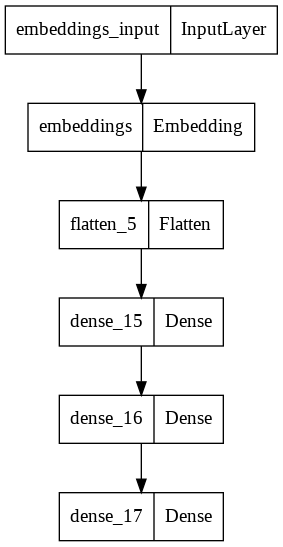

In [50]:
# Plotting the model

tf.keras.utils.plot_model(model)

In [51]:
# Compiling the model

optim = tf.keras.optimizers.Adam()
loss = tf.keras.losses.binary_crossentropy

model.compile(optimizer=optim, loss=loss, metrics=['acc'])

In [52]:
# Fitting the model

epochs = 15
batch_size = 32

model.fit(x=input_arr, y=output_arr, epochs=epochs, batch_size=batch_size)

Epoch 1/15
1018/1018 [==============================] - 3s 2ms/step - loss: 0.0564 - acc: 0.9977
Epoch 2/15
1018/1018 [==============================] - 2s 2ms/step - loss: 6.0712e-05 - acc: 1.0000
Epoch 3/15
1018/1018 [==============================] - 2s 2ms/step - loss: 1.6368e-05 - acc: 1.0000
Epoch 4/15
1018/1018 [==============================] - 2s 2ms/step - loss: 6.5727e-06 - acc: 1.0000
Epoch 5/15
1018/1018 [==============================] - 2s 2ms/step - loss: 3.0755e-06 - acc: 1.0000
Epoch 6/15
1018/1018 [==============================] - 2s 2ms/step - loss: 1.5522e-06 - acc: 1.0000
Epoch 7/15
1018/1018 [==============================] - 2s 2ms/step - loss: 8.1725e-07 - acc: 1.0000
Epoch 8/15
1018/1018 [==============================] - 2s 2ms/step - loss: 4.4147e-07 - acc: 1.0000
Epoch 9/15
1018/1018 [==============================] - 2s 2ms/step - loss: 2.4231e-07 - acc: 1.0000
Epoch 10/15
1018/1018 [==============================] - 2s 2ms/step - loss: 1.3448e-07 - acc: 

In [71]:
# Get the output dimensions

embeddings = pd.DataFrame(index=sorted(mapping, key=lambda x: mapping[x]), data=model.get_layer('embeddings').get_weights()[0])
embeddings.head(20)

,0,1,2,3,4,5,6,7
Bachelors,0.252934,-0.190030,0.257693,0.194398,0.188532,0.205872,-0.190422,-0.260102
HS-grad,0.238017,0.152650,0.284268,0.226251,-0.122296,0.220379,-0.242633,-0.252637
11th,0.275095,-0.140071,0.249467,0.202508,0.134843,0.193922,-0.156283,-0.213891
Masters,0.188087,-0.019145,0.192795,0.278060,0.200356,0.227384,-0.225143,-0.233040
9th,0.182934,0.078168,0.167881,0.292857,-0.044848,0.229607,-0.222022,-0.246768
Some-college,0.178920,-0.186320,0.236313,0.230290,0.203134,0.249044,-0.273903,-0.191804
Assoc-acdm,0.239656,0.098393,0.233845,0.348319,-0.028884,0.214587,-0.215831,-0.180227
Assoc-voc,0.241859,0.108317,0.274085,0.220658,-0.080140,0.256991,-0.195085,-0.219523
7th-8th,0.204497,-0.001925,0.229773,0.268351,0.197292,0.205566,-0.178486,-0.204732
Doctorate,0.164060,-0.049840,0.223363,0.272160,0.226422,0.210167,-0.203168,-0.208977
